In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Обрабатываем только train.csv-файл, так как в test.csv-файле
# отсутствует целевая переменная

In [7]:
# Загрузка данных
data = pd.read_csv('raw_train.csv')
data.head(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


In [9]:
# В спринте 2 было показано, что пропусков и дубликатов в датасете НЕТ
# В спринте 2 было найдено, что выбросы есть по признакам Rotational speed [rpm] и Torque [Nm].
# В спринте 4 было показано, что если исключать эти выбросы статистическими методами,
# то отбрасывается много полезных данных
# Нужно исключить выбросы более аккуратно. Это может сделать DBSCAN, но для такой большой выборки он не работает.
# Исключим выбросы по-другому

In [11]:
# Функция отрисовки диаграммы рассеяния,
# по одной оси Rotational speed [rpm], по другой оси Torque [Nm]
def draw_scatter():
    data_not_failure = data.loc[data['Machine failure'] == 0]
    data_failure = data.loc[data['Machine failure'] == 1]
    plt.scatter(data_not_failure['Rotational speed [rpm]'], data_not_failure['Torque [Nm]'], c='blue')
    plt.scatter(data_failure['Rotational speed [rpm]'], data_failure['Torque [Nm]'], c='red')
    plt.title('Scatter graph')
    plt.xlabel('Rotational speed [rpm]')
    plt.ylabel('Torque [Nm]')

# Функция отрисовки диаграммы рассеяния и прямой отсечения выбросов,
# a, b - параметры прямой с уравнением y = ax + b
def draw_scatter_with_cutoff_line(a,b):
    draw_scatter()
    x1 = np.linspace(1150, 2900, 100)
    y1 = a*x1 + b
    plt.plot(x1, y1, c='orange')
    plt.title('Scatter graph with cutoff line')

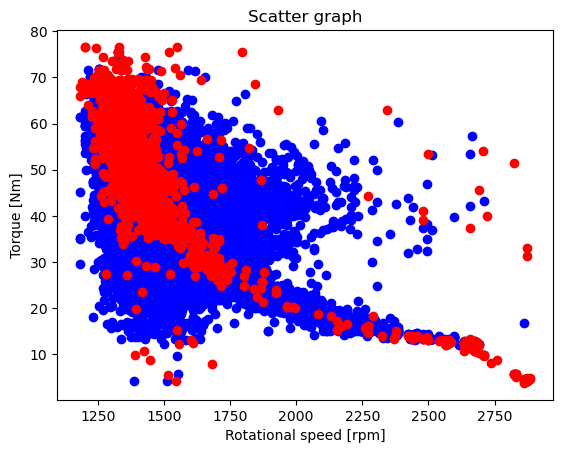

In [13]:
# Диаграмма рассеяния всей выборки
draw_scatter()

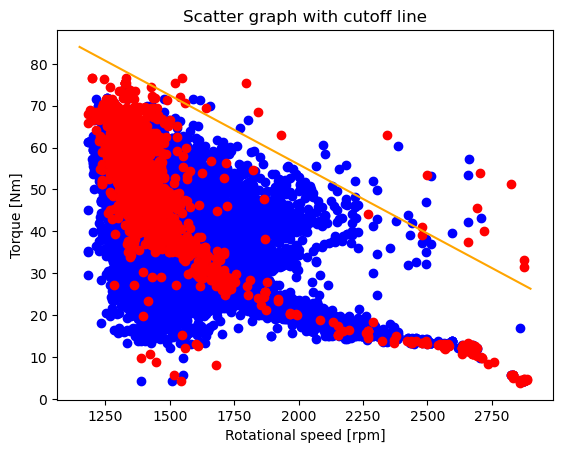

In [15]:
# Подбираем прямую для отсечения части выбросов
draw_scatter_with_cutoff_line(-0.033,122)

In [17]:
# Удаляем всё, что выше оранжевой прямой
data = data.drop(data[data['Torque [Nm]'] - (-0.033)*(data['Rotational speed [rpm]']) - 122 > 0].index)

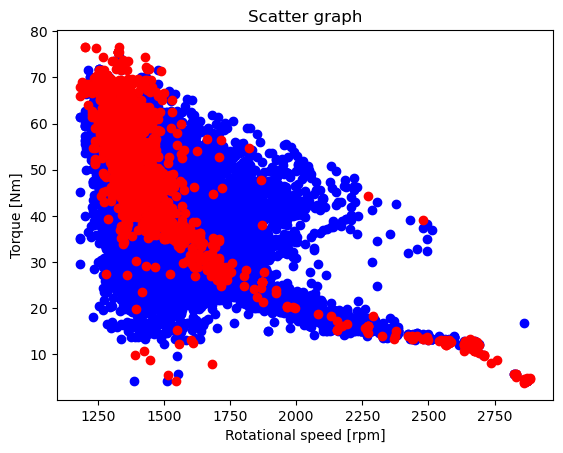

In [19]:
draw_scatter()

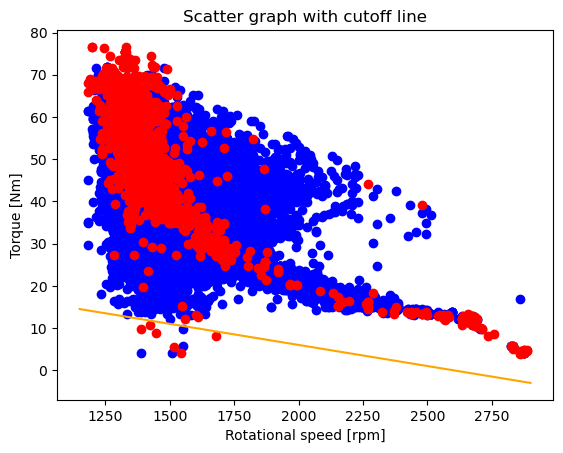

In [21]:
# Подбираем прямую для отсечения ещё части выбросов
draw_scatter_with_cutoff_line(-0.01,26)

In [23]:
# Удаляем всё, что ниже оранжевой прямой
data = data.drop(data[data['Torque [Nm]'] - (-0.01)*(data['Rotational speed [rpm]']) - 26 < 0].index)

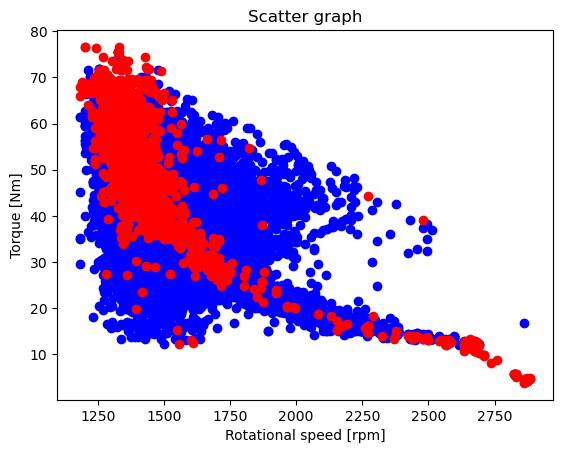

In [25]:
draw_scatter()

In [27]:
# Функция отрисовки диаграммы рассеяния и двух прямых отсечения выбросов,
# g, h - параметры прямых с уравнениями x = g, y = h
def draw_scatter_with_two_cutoff_lines(g,h):
    draw_scatter()
    x1 = np.linspace(g, g, 100)
    y1 = np.linspace(h, 76, 100)
    plt.plot(x1, y1, c='orange')
    x2 = np.linspace(g, 2900, 100)
    y2 = np.linspace(h, h, 100)
    plt.plot(x2, y2, c='orange')
    plt.title('Scatter graph with 2 cutoff lines')

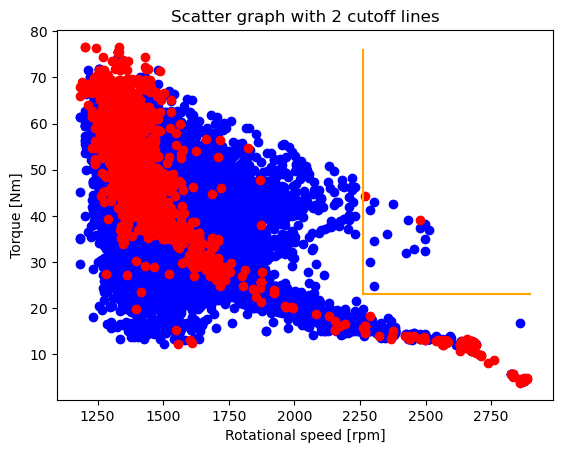

In [29]:
draw_scatter_with_two_cutoff_lines(2260,23)

In [31]:
# Удаляем всё, что отсёк оранжевый уголок
data = data.drop(data[(data['Rotational speed [rpm]'] > 2260) & (data['Torque [Nm]'] > 23)].index)

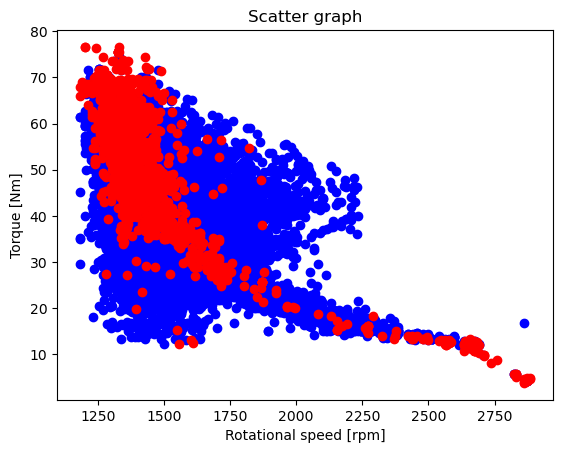

In [33]:
draw_scatter()

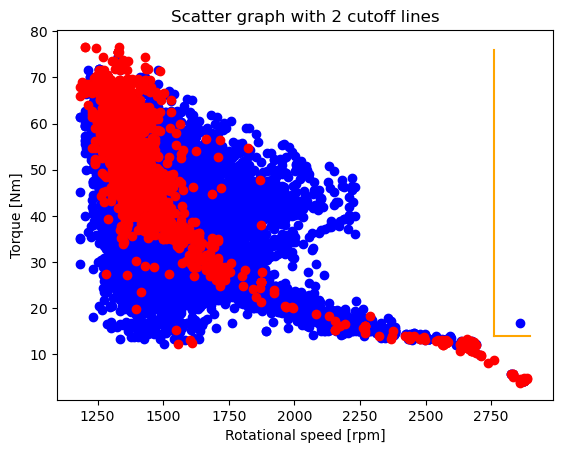

In [35]:
draw_scatter_with_two_cutoff_lines(2760,14)

In [37]:
# Удаляем всё, что отсёк оранжевый уголок
data = data.drop(data[(data['Rotational speed [rpm]'] > 2760) & (data['Torque [Nm]'] > 14)].index)

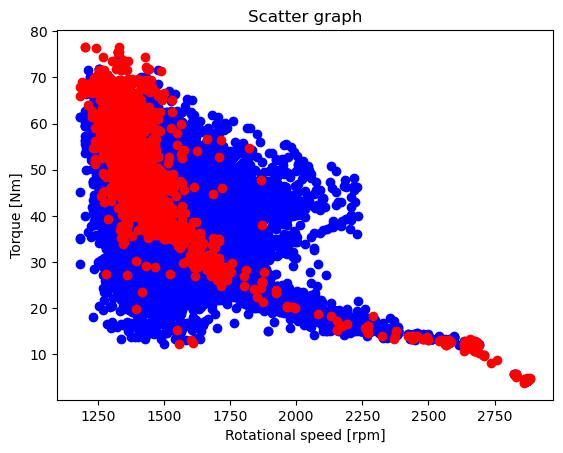

In [39]:
draw_scatter()

In [41]:
# Сохранение предобработанных данных
data.to_csv('data_train_proc_step1_outlines.csv', sep=';', index=False)